In [220]:
from data_pre_processing import *
from pair_finder import *
from back_tester import *
import itertools

# Load data 
---

In [221]:
# #Merge dataframes

# merge_ohlc_closing_prices("binance_data/Hard_Fork_Btc/2024/5m")

In [222]:
prices = pd.read_csv("binance_data/Wrapped BTC/2024/30m/merged_closing_prices.csv", index_col=0, parse_dates=True)

In [223]:
prices

,BTC/USDT_2024_30m,WBTC/USDT_2024_30m
timestamp,,
2024-01-01 00:00:00,42419.73,42394.30
2024-01-01 00:30:00,42475.23,42444.16
2024-01-01 01:00:00,42493.16,42431.64
2024-01-01 01:30:00,42613.56,42616.90
2024-01-01 02:00:00,42546.01,42458.23
...,...,...
2024-12-31 21:30:00,93899.68,93748.37
2024-12-31 22:00:00,93722.23,93553.89
2024-12-31 22:30:00,93488.84,93329.48


Text(0.5, 1.0, 'BTC/USDT_2024_30m and WBTC/USDT_2024_30m Closing Prices')

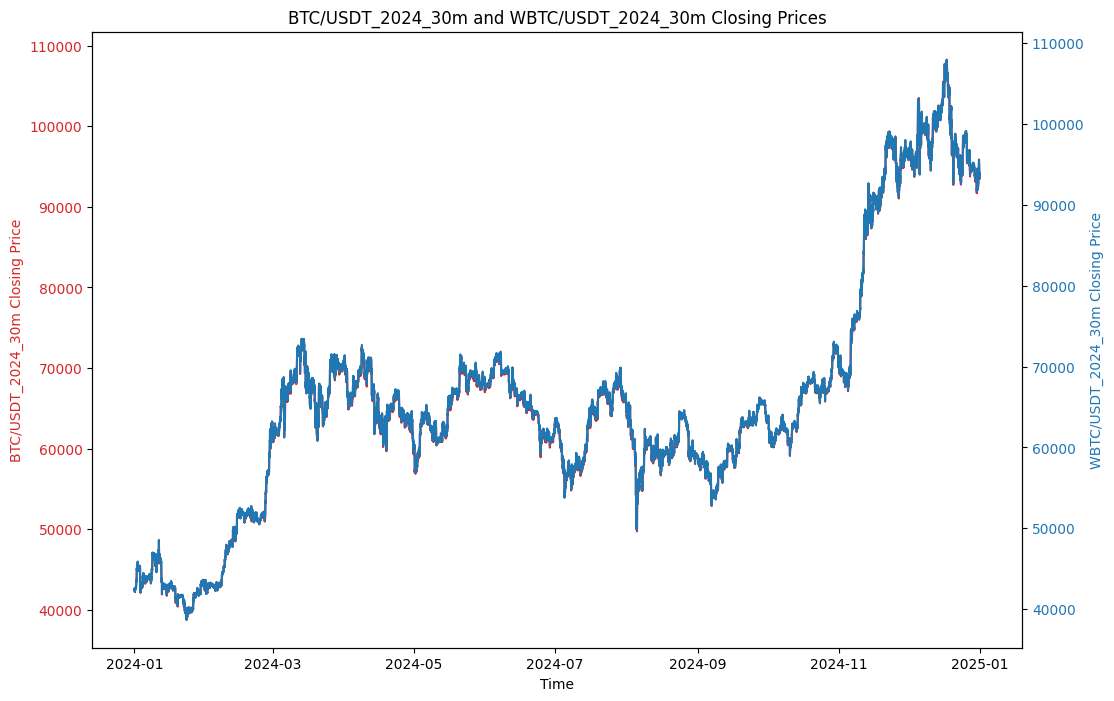

In [224]:
#Plot the closing prices of the merged data using different y axis

crypto_1 = prices.columns[0]
crypto_2 = prices.columns[1]

fig, ax1 = plt.subplots()

#Set size of the plot
fig.set_size_inches(12, 8)

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel(f'{crypto_1} Closing Price', color=color)
ax1.plot(prices.index, prices[crypto_1], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel(f'{crypto_2} Closing Price', color=color)
ax2.plot(prices.index, prices[crypto_2], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Add a title to the plot
plt.title(f'{crypto_1} and {crypto_2} Closing Prices')







In [225]:
#Calculate correlation matrix
correlation_matrix = prices.corr()
correlation_matrix

,BTC/USDT_2024_30m,WBTC/USDT_2024_30m
BTC/USDT_2024_30m,1.000000,0.999981
WBTC/USDT_2024_30m,0.999981,1.000000


# Test for pairs
---

* ## Apply correlation filter

In [226]:

# Pre-filter: Calculate correlation matrix and select pairs with high correlation
corr_threshold = 0.8
corr_matrix, high_corr_pairs = filter_high_correlation_pairs(prices, threshold=corr_threshold)
print(f"\nPairs with correlation >= {corr_threshold}:")
for pair in high_corr_pairs:
    print(f"{pair[0]} & {pair[1]}: correlation = {pair[2]:.4f}")

# Cointegration test
cointegrated_pairs, pvalue_matrix, residuals_df = find_cointegrated_pairs(prices, high_corr_pairs,significance=0.05)
#cointegrated_pairs, window_results = find_cointegrated_pairs_windows(prices, high_corr_pairs, significance=0.05, window_size=720, min_pass_fraction=0.5)



Pairs with correlation >= 0.8:
BTC/USDT_2024_30m & WBTC/USDT_2024_30m: correlation = 1.0000

Cointegrated pairs (from pre-filtered high-correlation pairs):
BTC/USDT_2024_30m & WBTC/USDT_2024_30m: p-value = 0.0000, correlation = 1.0000


In [227]:
high_corr_pairs = []

* ## Test cointegration in windows

In [228]:
#Params
window_size = 336
min_pass_fraction = 0.1
significance = 0.05

#Find cointegrated pairs
cointegrated_pairs, window_results = find_cointegrated_pairs_windows(prices, high_corr_pairs, significance, window_size, min_pass_fraction)


Cointegrated pairs (across windows):
BTC/USDT_2024_30m & WBTC/USDT_2024_30m: pass fraction=0.62, avg p-value=0.0945, correlation=0.0


In [229]:
#Window results
window_results

{('BTC/USDT_2024_30m',
  'WBTC/USDT_2024_30m'): [np.float64(1.1052163620293125e-10), np.float64(0.0024980362270819816), np.float64(0.19865565238743016), np.float64(1.3571416270309707e-08), np.float64(2.5260338425475693e-07), np.float64(0.0024242206831577634), np.float64(0.04063525785323447), np.float64(0.16601907643623004), np.float64(0.49661260299546234), np.float64(0.16088592532884316), np.float64(0.003246336243879232), np.float64(0.4737367938418418), np.float64(5.5770329730817575e-06), np.float64(4.90925707276707e-08), np.float64(0.00228805694657704), np.float64(0.0435078378107749), np.float64(0.00211181365436758), np.float64(0.0005528209391805293), np.float64(2.2524766491259974e-15), np.float64(0.39490769338412024), np.float64(0.00030815019748295207), np.float64(0.1348629805481984), np.float64(0.06097222416978671), np.float64(0.7719691118623224), np.float64(0.18515023221331406), np.float64(0.0019341081873916694), np.float64(0.06376646031542944), np.float64(0.0010856517856753446), n

Plotting will proceed, but alignment may be incorrect.


KeyError: 'LTC/USDT_2024_30m'

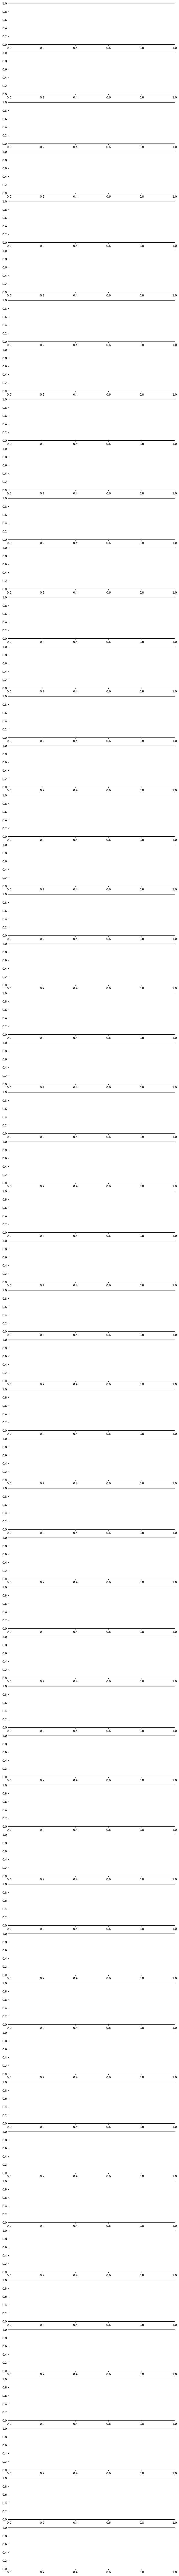

In [230]:
#Plot windows

windows = split_price_series_into_windows(prices, window_size)

#For ICP/USDT_2024_1h', 'ADA/USDT_2024_1h
plot_spread_in_windows('LTC/USDT_2024_30m', 'DOGE/USDT_2024_30m', windows, window_results, significance=0.05) #These spreads look like they are standardised, but they are not. They are centered around 0 due to the inclusion of the intercept term in the cointegration test. The spread is still in the original units of the data.
#plot_spread_in_windows('S1', 'S2', windows, window_results, significance=0.05)

#Check number of windows
#-----------------------
window_results.values()

#Count number of values in window_results
num_windows = 0
for key in window_results.keys():
    print(key)
    num_windows += len(window_results[key])

print(f"Number of windows: {num_windows}")

* ### Check resiuals

In [108]:
# #If you suspect daily intraday patterns, using 24 lags is a natural choice: it checks each hour in a 24-hour cycle for dependence.
# #If your sample is large enough (covering many days/weeks), 24 lags is typically enough to detect standard intraday correlation
# analyze_residuals(residuals_df, lags = 24)

# Validation of cointegration methods using data designed for cointegration
---

In [109]:
# import numpy as np
# import pandas as pd

# def generate_cointegrated_data(
#     n=720,  # number of data points
#     alpha=5.0,
#     beta=1.5,
#     phi=0.8, #manually set to 0.8 so that the spread is stationary (no unit root)
#     seed=42
# ):
#     """
#     Generate two cointegrated series: S1 (random walk) and S2 (linear function of S1 + stationary AR(1) noise).
    
#     Parameters:
#         n (int): Number of observations (e.g. 720 for ~1 month of hourly data).
#         alpha (float): Intercept term for S2.
#         beta (float): S2 coefficient for S1.
#         phi (float): AR(1) coefficient for the noise in S2 - beta*S1. Must be <1 in abs value for stationarity.
#         seed (int): Random seed for reproducibility.

#     Returns:
#         pd.DataFrame with columns ['S1', 'S2'] representing the two cointegrated time series.
#     """
#     rng = np.random.default_rng(seed)
    
#     # 1) Generate S1 as a random walk
#     #   S1_t = S1_{t-1} + e1_t
#     e1 = rng.normal(loc=0.0, scale=1.0, size=n)
#     S1 = np.cumsum(e1)  # cumsum => random walk
    
#     # 2) Generate a stationary AR(1) noise for the spread
#     #   ARnoise_t = phi * ARnoise_{t-1} + e2_t
#     e2 = rng.normal(loc=0.0, scale=1.0, size=n)
#     ARnoise = np.zeros(n)
#     for t in range(1, n):
#         ARnoise[t] = phi * ARnoise[t-1] + e2[t]
#     # ARnoise is stationary if |phi| < 1
    
#     # 3) Define S2 = alpha + beta*S1 + AR(1) noise
#     S2 = alpha + beta*S1 + ARnoise
    
#     # Put them in a DataFrame
#     df = pd.DataFrame({'S1': S1, 'S2': S2})
#     return df

# # Example usage
# if __name__ == "__main__":
#     df_cointegrated = generate_cointegrated_data(n=720)
#     print(df_cointegrated.head(10))


In [110]:
# # Suppose df has columns: 'S1', 'S2'
# alpha = 5.0
# beta = 1.5

# # Calculate the spread: S2 - (alpha + beta * S1)
# df_cointegrated['spread'] = df_cointegrated['S2'] - alpha - beta * df_cointegrated['S1']

# # Plot
# plt.figure(figsize=(10,6))
# plt.plot(df_cointegrated['spread'], label='Spread = S2 - alpha - beta*S1')
# plt.axhline(df_cointegrated['spread'].mean(), color='red', linestyle='--', label='Mean')
# plt.title('Spread Over Time')
# plt.legend()
# plt.show()


In [111]:
# cointegrated_pairs, window_results = find_cointegrated_pairs_windows(df_cointegrated, high_corr_pairs, significance=0.05, window_size=240, min_pass_fraction=0.5)

In [112]:
# window_results